In [1]:
from haven import haven_jupyter as hj
from haven import haven_results as hr
from haven import haven_utils as hu
import pprint
import numpy as np

# path to where the experiments are saved
savedir_base = './output'
exp_config_fname = './exp_configs.py'
runs=2


In [2]:
def form_exp_list(exp_groups, exp_config_fname):
    exp_list = []
    for e in exp_groups:
        exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[e]
    return exp_list


# print(form_exp_list(["exp_mushrooms", "exp_ijcnn","exp_rcv1"],exp_config_fname))


markersize = 8
markevery = 15
linewidth = 1
marker = '*'
styles = {}

styles['EXP_SGD_CNST'] = {'label':'K-CNST',  'color':'blue','marker':marker ,
                         'markersize':15, 'marker':'*',
                           'linewidth': 2,
                     'markevery':markevery }

styles['EXP_SGD_DECR'] = {'label':'K-EXP',  'color':'cyan','marker':marker ,
                         'markersize':15, 'marker':'d',
                           'linewidth': 2,
                     'markevery':markevery }


styles['EXP_ACC_SGD_CNST'] = {'label':'ACC-K-CNST',  'color':'orange','marker':marker ,
                         'markersize':15, 'marker':'x',
                           'linewidth': 2,
                     'markevery':markevery }

styles['EXP_ACC_SGD_DECR'] = {'label':'ACC-K-EXP',  'color':'red','marker':marker ,
                         'markersize':15, 'marker':'o',
                           'linewidth': 2,
                     'markevery':markevery }

styles['EXP_SLS_DECR'] = {'label':'SLS-EXP',  'color':'green','marker':marker ,
                         'markersize':15, 'marker':'+',
                           'linewidth': 2,
                     'markevery':markevery }

styles['RIT_SGD'] = {'label':'KR-20',  'color':'black','marker':marker ,
                         'markersize':15, 'marker':'s',
                           'linewidth': 2,
                     'markevery':markevery }


# ExpList for Losses

In [6]:
datasets = ["mushrooms"]
exp_groups = []

for dataset in datasets:
    exp_groups.append("exp_" + dataset)
exp_list = form_exp_list(exp_groups, exp_config_fname)

loss_exp_dict={}
combined_filter_dict={}

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
   
    rfilteres=[({"loss_func":loss_func})] 
    rest_exp=hr.filter_exp_list(exp_list, filterby_list=rfilteres, verbose=0)
    loss_exp_dict[loss_func]=rest_exp 


for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
    filtered_best_exp_list=[]
    filtered_best_exp_list += [        
        ({'opt':{'name':'RIT_SGD'},  
            "loss_func":loss_func},
            {'style':styles["RIT_SGD"]})]

    for alpha_t in ["CNST","DECR"]: 

        filtered_best_exp_list += [        
            ({'opt':{'name':'EXP_ACC_SGD','alpha_t':alpha_t}, 
                "loss_func":loss_func},
               {'style':styles["EXP_ACC_SGD_"+alpha_t]})]



        filtered_best_exp_list += [        
            ({'opt':{'name':'EXP_SGD','alpha_t':alpha_t, "is_sls":False },  
                "loss_func":loss_func},
               {'style':styles["EXP_SGD_"+alpha_t]})]

    filtered_best_exp_list +=[        
            ({'opt':{'name':'EXP_SGD',"is_sls":True },  
                "loss_func":loss_func},
               {'style':styles["EXP_SLS_DECR"]})]

   
    combined_filter_dict[loss_func]=filtered_best_exp_list 
# print(combined_filter_dict["squared_loss"])
# print(loss_exp_dict["squared_loss"])
print(len(hr.filter_exp_list(loss_exp_dict["logistic_loss"], filterby_list=combined_filter_dict["logistic_loss"], verbose=0)  )  )
    

12


# Squared Loss

[{'dataset': 'mushrooms', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SGD', 'r': 1, 'alpha_t': 'CNST', 'is_sls': False}, 'regularization_factor': 0.01, 'batch_size': 1, 'max_epoch': 10, 'runs': 0}, {'dataset': 'mushrooms', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SGD', 'r': 1, 'alpha_t': 'CNST', 'is_sls': False}, 'regularization_factor': 0.01, 'batch_size': 1, 'max_epoch': 10, 'runs': 1}, {'dataset': 'mushrooms', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SGD', 'r': 1, 'alpha_t': 'DECR', 'is_sls': False}, 'regularization_factor': 0.01, 'batch_size': 1, 'max_epoch': 10, 'runs': 0}, {'dataset': 'mushrooms', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SGD', 'r': 1, 'alpha_t': 'DECR', 'is_sls': False}, 'regularization_factor': 0.01, 'batch_size': 1, 'max_epoch': 10, 'runs': 1}, {'dataset': 'mushrooms', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SGD', 'r': 1, 'alpha_t': 'DECR', 'is_sls': True}, 'regularization_factor': 0.01, 'batch_size': 1, 'max_epoch': 1

[<Figure size 1368x360 with 1 Axes>]

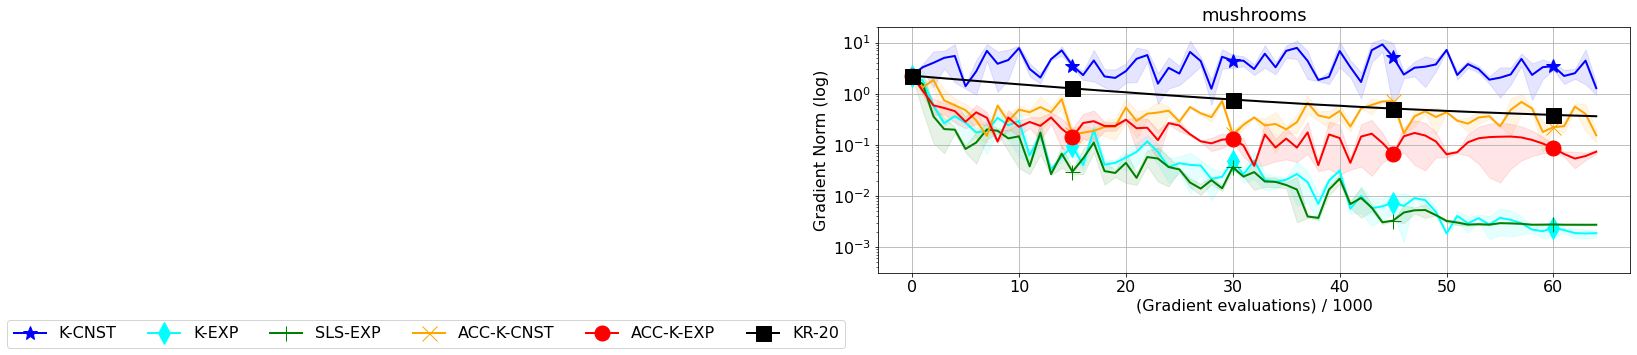

In [19]:
show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["squared_loss"],
                    savedir_base=savedir_base,
                    filterby_list=combined_filter_dict["squared_loss"],
                    verbose= 0       
                     )
rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['grad_norm'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ["grad_norm"],
    legend_fontsize=16,
     x_fontsize=16,
     y_fontsize=16,
     xtick_fontsize=16,
     ytick_fontsize=16,
     title_fontsize=18,
    
     ylim_list=[
                 [(10**(-3.5), 20.)]],# (10**(-3), 24), (10**(-3.1), 10**(-.8))]],
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(19,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[-.6, -0.25], 
                           'borderaxespad':0., 
                           'ncol':7,'loc':'center'},
    savedir_plots='./squared'
            )

# Logistic Loss

[{'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SGD', 'r': 1, 'alpha_t': 'CNST', 'is_sls': False}, 'regularization_factor': 0.01, 'batch_size': 1, 'max_epoch': 10, 'runs': 0}, {'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SGD', 'r': 1, 'alpha_t': 'CNST', 'is_sls': False}, 'regularization_factor': 0.01, 'batch_size': 1, 'max_epoch': 10, 'runs': 1}, {'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SGD', 'r': 1, 'alpha_t': 'DECR', 'is_sls': False}, 'regularization_factor': 0.01, 'batch_size': 1, 'max_epoch': 10, 'runs': 0}, {'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SGD', 'r': 1, 'alpha_t': 'DECR', 'is_sls': False}, 'regularization_factor': 0.01, 'batch_size': 1, 'max_epoch': 10, 'runs': 1}, {'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SGD', 'r': 1, 'alpha_t': 'DECR', 'is_sls': True}, 'regularization_factor': 0.01, 'batch_size': 1, 'max_epoc

[<Figure size 1368x360 with 1 Axes>]

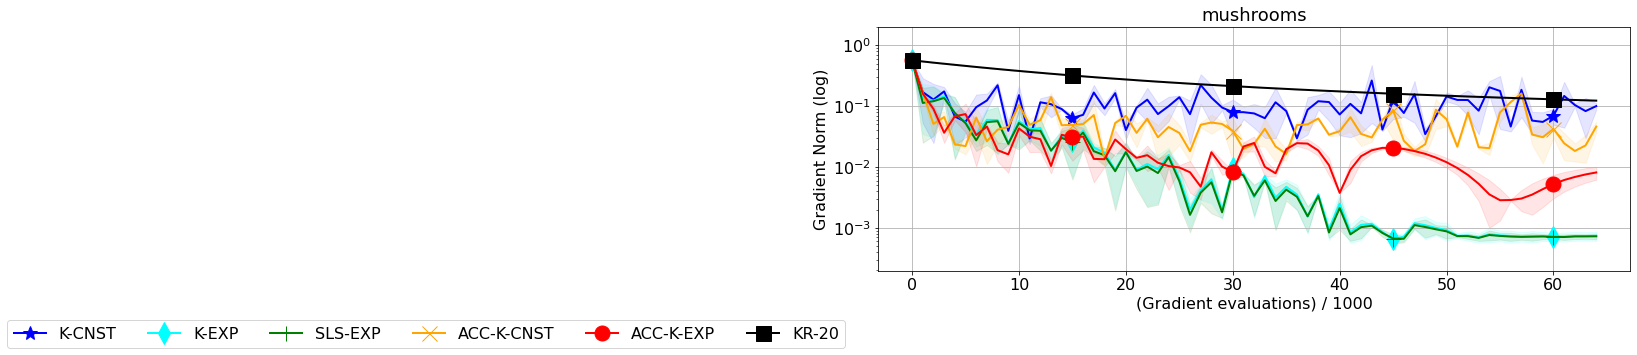

In [27]:
show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["logistic_loss"],
                    savedir_base=savedir_base,
                    filterby_list=combined_filter_dict["logistic_loss"],
                    verbose= 0       
                     )


rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['grad_norm'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ["grad_norm"],
    legend_fontsize=16,
     x_fontsize=16,
     y_fontsize=16,
     xtick_fontsize=16,
     ytick_fontsize=16,
     title_fontsize=18,
      ylim_list=[
                 [(10**(-3.7), 2)]],#, (10**(-3.3), 10**(-0.1)), (10**(-3.6), 10**(-1))]],    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(19,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[-.6, -0.26], 'ncol':6, 'loc':'center'},
    savedir_plots='./logistic'
            )